In [1]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

urlretrieve("https://covid.ourworldindata.org/data/owid-covid-data.csv", "owid-covid-data.csv")

('owid-covid-data.csv', <http.client.HTTPMessage at 0x2f0b96db820>)

In [2]:
data = pd.read_csv("owid-covid-data.csv", index_col = "iso_code")

In [3]:
# convert the dates in the data to number of days since March 1, 2020
def dates_to_days_since(dates):
    days_since = []
    for date in dates:
        date_time_obj = datetime.strptime(date, "%Y-%m-%d")
        init_date = datetime(2020, 3, 1)
        days_since.append((date_time_obj - init_date).days)
    return days_since

In [4]:
# single function for plotting each metric
def plot_general(country_list, metric):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")

    # loop through each listed country
    for country in country_list:
        country_data = data[data["location"] == country]
        dates = country_data["date"]
        days_since = dates_to_days_since(dates)
        new_cases = country_data[metric]
        plt.plot(days_since, new_cases, label=country)

    plt.xlim(0.)
    plt.ylim(0.)
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel(label_dict[metric][0])
    plt.legend(loc="best")
    plt.title(label_dict[metric][1])
    plt.tight_layout()
    
    return

In [5]:
# dictionary mapping the metrics to y-axis labels and plot titles
# format is like:
# metric:[y_label, title]
label_dict = {
    "positive_rate":["Positive testing rate", "Rate of positive testing by country"],
    "new_cases_smoothed_per_million":["New cases per million (smoothed)", "New cases per million by country"],
    "new_deaths_smoothed_per_million":["New deaths per million (smoothed)", "New deaths per million by country"],
    "icu_patients_per_million":["ICU patients per million", "ICU patients per million by country"],
    "new_vaccinations_smoothed_per_million":["New vaccinations per million (smoothed)", "New vaccinations per million by country"],
    "people_fully_vaccinated_per_hundred":["People fully vaccinated per hundred", "People fully vaccinated per hundred by country"]
}

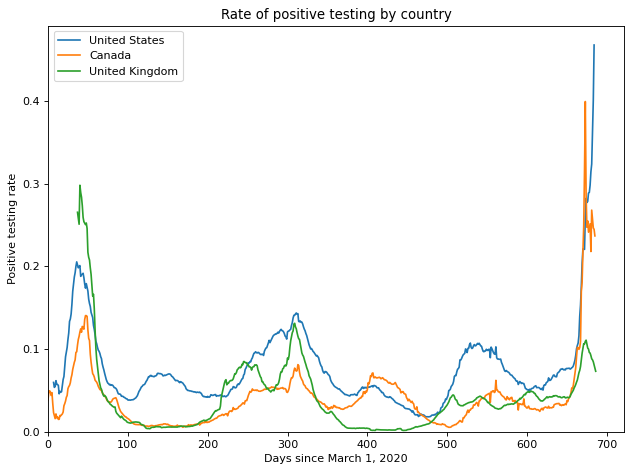

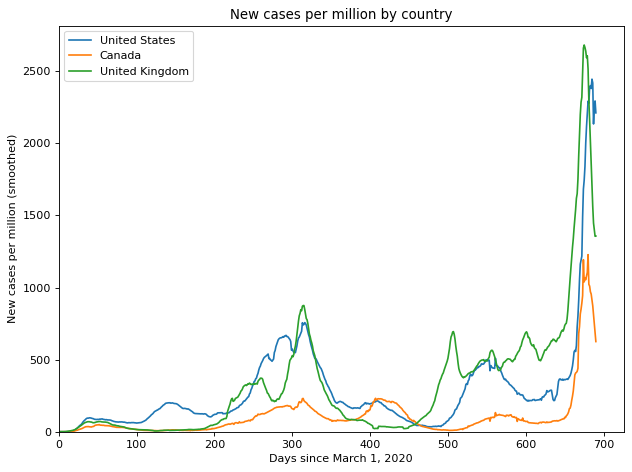

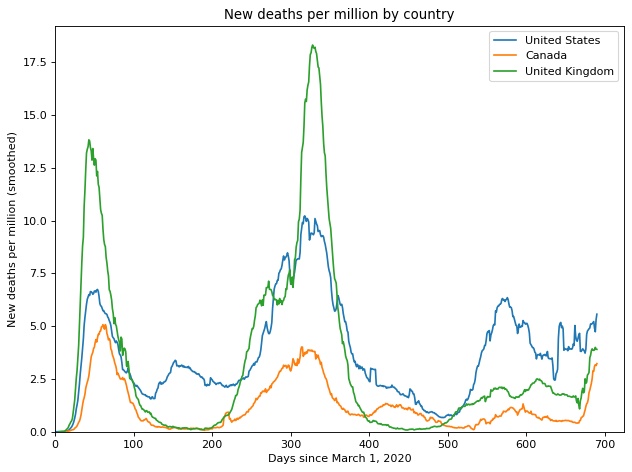

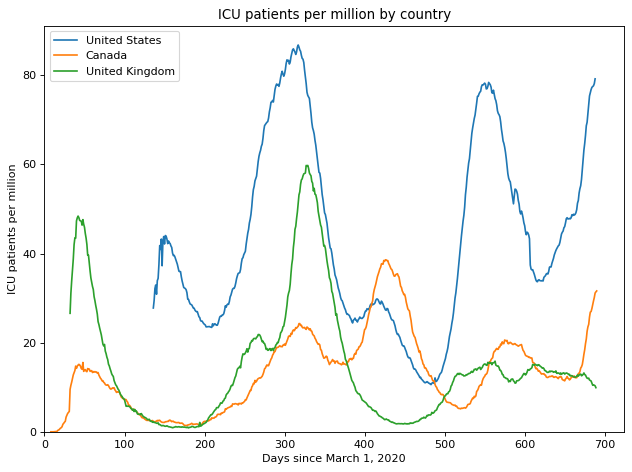

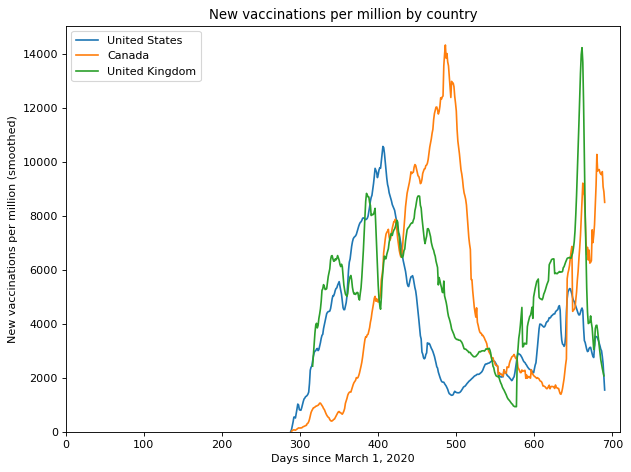

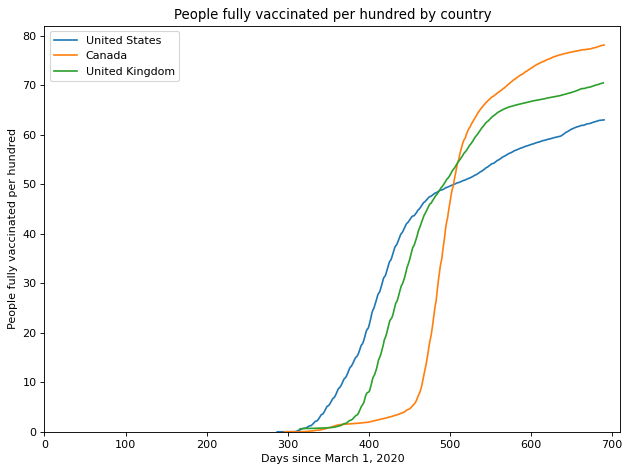

In [6]:
# define which countries you want the metrics plotted for
country_list = ["United States", "Canada", "United Kingdom"]

# loop through each metric
for key in label_dict:
    plot_general(country_list, key)